In [6]:
require 'torch';
require 'nn';
-- os.execute('wget -c https://s3.amazonaws.com/torch7/data/cifar10torchsmall.zip')
-- os.execute('unzip cifar10torchsmall.zip')
trainset = torch.load('dataset/cifar10-train.t7')
testset = torch.load('dataset/cifar10-test.t7')
classes = {'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'}

In [7]:
-- ignore setmetatable for now, it is a feature beyond the scope of this tutorial. It sets the index operator.
setmetatable(trainset, 
    {__index = function(t, i) 
                    return {t.data[i], t.label[i]} 
                end}
);
setmetatable(testset, 
    {__index = function(t, i) 
                    return {t.data[i], t.label[i]} 
                end}
);

trainset.data = trainset.data:double() -- convert the data from a ByteTensor to a DoubleTensor.
testset.data = testset.data:double() -- convert the data from a ByteTensor to a DoubleTensor.

function trainset:size() 
    return self.data:size(1) 
end

function testset:size() 
    return self.data:size(1) 
end

# StochasticGradient: training	


# current error = 2.0127996100462	


# current error = 1.7020472834717	


# current error = 1.5985320526861	


# current error = 1.5252921070305	


# current error = 1.467068243084	
# StochasticGradient: you have reached the maximum number of iterations	
# training error = 1.467068243084	
nil	


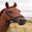

In [10]:
net = nn.Sequential()
net:add(nn.SpatialConvolution(3, 6, 5, 5)) -- 3 input image channels, 6 output channels, 5x5 convolution kernel
net:add(nn.SpatialMaxPooling(2,2,2,2))     -- A max-pooling operation that looks at 2x2 windows and finds the max.
net:add(nn.SpatialConvolution(6, 16, 5, 5))
net:add(nn.SpatialMaxPooling(2,2,2,2))
net:add(nn.View(16*5*5))                    -- reshapes from a 3D tensor of 16x5x5 into 1D tensor of 16*5*5
net:add(nn.Linear(16*5*5, 120))             -- fully connected layer (matrix multiplication between input and weights)
net:add(nn.Linear(120, 84))
net:add(nn.Linear(84, 10))                   -- 10 is the number of outputs of the network (in this case, 10 digits)
net:add(nn.LogSoftMax())                     -- converts the output to a log-probability. Useful for classification problems

-- Defining Loss Function
criterion = nn.ClassNLLCriterion()
trainer = nn.StochasticGradient(net, criterion)
trainer.learningRate = 0.0001
trainer.maxIteration = 5 -- just do 5 epochs of training.

--Training
trainer:train(trainset)

--Testing
predicted = net:forward(testset.data[100])

y,i = torch.max(predicted, 1)

print(classes[i])

--Show image
itorch.image(testset.data[100])